In [1]:
from sklearn import svm
from LoadData import LoadData
import matplotlib.pyplot as plt
#get_ipython().magic('matplotlib inline')
%matplotlib inline
from scipy import misc
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
accuracy= {}
models = ['BoW_hist',]
kernels = ['linear', 'rbf', 'sigmoid']

In [3]:
for model in models:
    accuracy[model] = []
    for i in range(1,4):
        print('split ', str(i), ": ")
        temp_accuracy=[]

        train_X, test_X, train_Y, test_Y = LoadData().loadData('db'+str(i), model)

        clf = svm.SVC(kernel='linear',C=1.5).fit(train_X, train_Y) ## svm kernel linear
        temp_accuracy.append(clf.score(test_X, test_Y)) ## add accuracy

        clf = svm.SVC(kernel='rbf',C=1).fit(train_X, train_Y) ## svm kernel rbf
        temp_accuracy.append(clf.score(test_X,test_Y)) 

        clf = svm.SVC(kernel='sigmoid',C=1).fit(train_X, train_Y) ## svm kernel sigmoid
        temp_accuracy.append(clf.score(test_X, test_Y))

        #clf = LinearRegression().fit(train_X, train_Y)
        #temp_accuracy.append(clf.score(test_X, test_Y))

        accuracy[model].append(temp_accuracy)
print("done")

split  1 : 
features.shape =  (2911, 500)
features.shape =  (728, 500)
split  2 : 
features.shape =  (2911, 500)
features.shape =  (728, 500)
split  3 : 
features.shape =  (2911, 500)
features.shape =  (728, 500)
done


In [4]:
# run test and show results
acc_table = {}
for model in models:
    print(model)
    acc_table[model] = pd.DataFrame(accuracy[model], columns=kernels)
    print(acc_table[model])

BoW_hist
     linear       rbf   sigmoid
0  0.876374  0.596154  0.144231
1  0.887363  0.590659  0.167582
2  0.888736  0.586538  0.177198


In [5]:
# write to csv file
with open('results.csv', mode='w') as result_file:
    result_file.write(',')
    for kernel in kernels:
        result_file.write(kernel +',')
    result_file.write('\n')
    for model in models:
        result_file.write(model + '\n')            
        for ele in accuracy[model]:
            result_file.write(',')
            for value in ele: 
            # result_file.write(''+',')
                result_file.write(str(value) + ',')
            result_file.write('\n')

In [6]:
print('BoW:')
print(acc_table['BoW_hist'].std())

BoW:
linear     0.006776
rbf        0.004824
sigmoid    0.016954
dtype: float64


### SVM classfify database 3, kernel = linear

In [7]:
train_X, test_X, train_Y, test_Y = LoadData().loadData('db3', 'BoW_hist')
clf = svm.SVC(kernel='linear',C=1).fit(train_X, train_Y) ## svm kernel rbf
label_SVM = clf.predict(test_X)
print('Done.')

features.shape =  (2911, 500)
features.shape =  (728, 500)
Done.


In [8]:
# get image list
imageData = LoadData().getImagePath('db3')

In [9]:

count = test_Y.shape[0] - sum((label_SVM==test_Y)*1)
print(count)

81


### Show some wrong predictions

c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


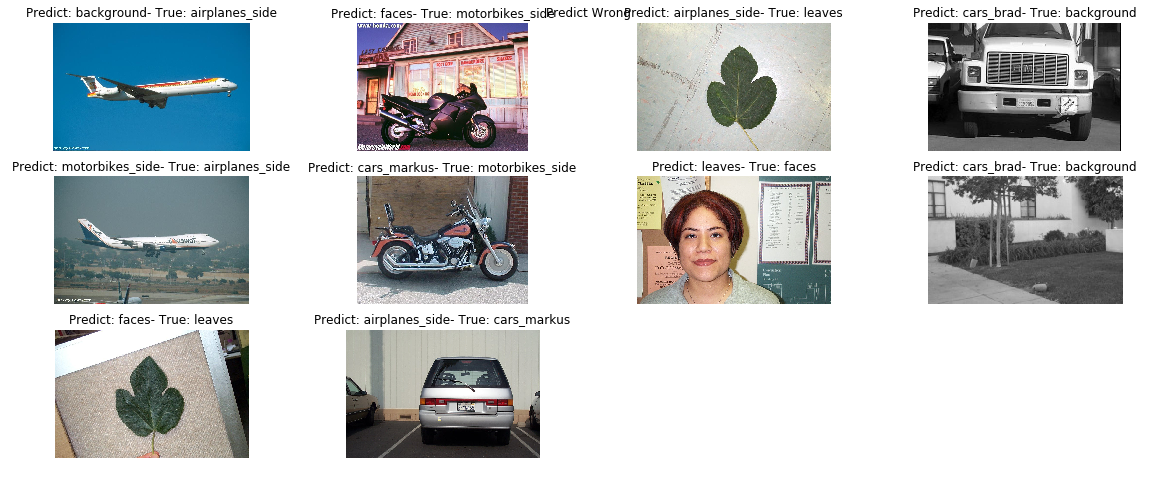

In [10]:
imageTest = imageData['testImages']
# create a fig to show image
fig = plt.figure(figsize=(20,8))

plt.title('Predict Wrong')
plt.axis('off')

predictTrue = label_SVM == test_Y
count = 0
# for all 0-9 labels
for i in range(test_Y.shape[0]):
    if count > 9:
        break
    if not predictTrue[i]:
        # initialize subplots in a grid 2x5 at i+1th position
        image = misc.imread(imageTest[i], mode='RGB')
        ax = fig.add_subplot(3, 4, 1+count) 
        # display image
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title("Predict: " + label_SVM[i] + "- True: " + test_Y[i])
        #ax.set_title("True: " + test_Y[i])
        #don't show the axes
        plt.axis('off')
        count += 1
plt.show()

### Show some true predictions

c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


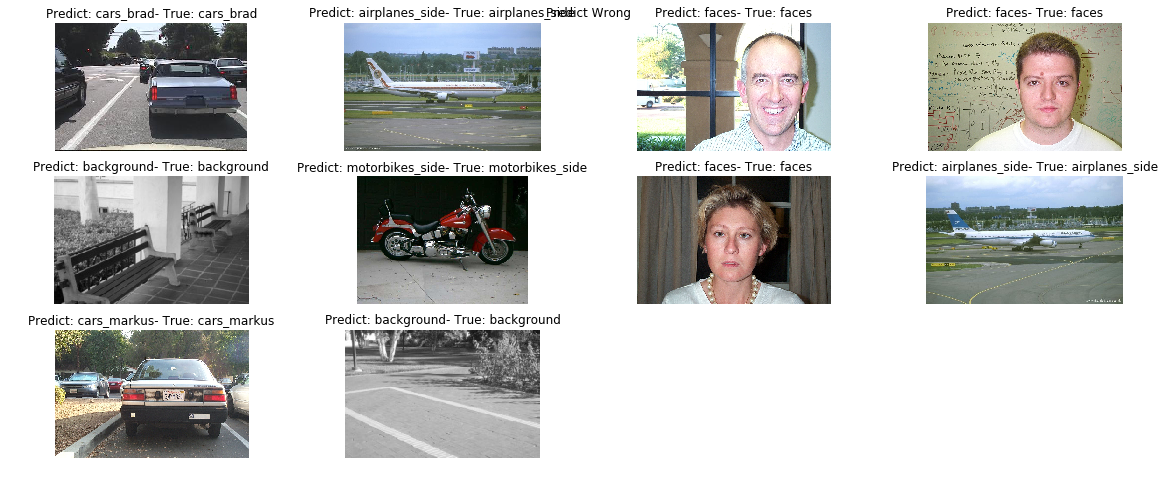

In [12]:
imageTest = imageData['testImages']
# create a fig to show image
fig = plt.figure(figsize=(20,8))

plt.title('Predict Wrong')
plt.axis('off')

predictTrue = label_SVM == test_Y
count = 0
# for all 0-9 labels
for i in range(test_Y.shape[0]):
    if count > 9:
        break
    if predictTrue[i]:
        # initialize subplots in a grid 2x5 at i+1th position
        image = misc.imread(imageTest[i], mode='RGB')
        ax = fig.add_subplot(3, 4, 1+count) 
        # display image
        ax.imshow(image, cmap=plt.cm.binary)
        ax.set_title("Predict: " + label_SVM[i] + "- True: " + test_Y[i])
        #ax.set_title("True: " + test_Y[i])
        #don't show the axes
        plt.axis('off')
        count += 1
plt.show()

### Plot confusion Matrix

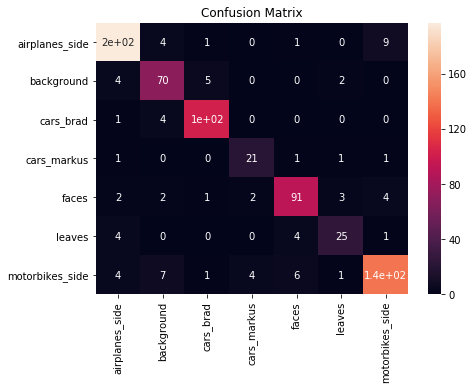

In [13]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix

classes = np.unique(test_Y)

confu_matrix = confusion_matrix(test_Y, label_SVM, labels=classes)

df = pd.DataFrame(confu_matrix, index=classes, columns = classes)
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix')
sn.heatmap(df, annot=True)